# 4.9: Intro to Data Visualization with Python

## This Notebook contains:
1. Import Data
2. Visualisations
   - Bar charts
   - Histograms and Scatterplots
   - Line charts

In [1]:
# Import libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

# 01. Import data

In [2]:
# Set folder path
path = r'C:\Users\hachl\Downloads\4.3_orders_products\02 Data\Prepared Data'

In [3]:
# Import the updated data set pickle file

ords_prods_merge = pd.read_pickle(os.path.join(path, 'dataset_aggregated.pkl'))

# 02. Visualisations

## Bar Charts

<Axes: xlabel='orders_day_of_week'>

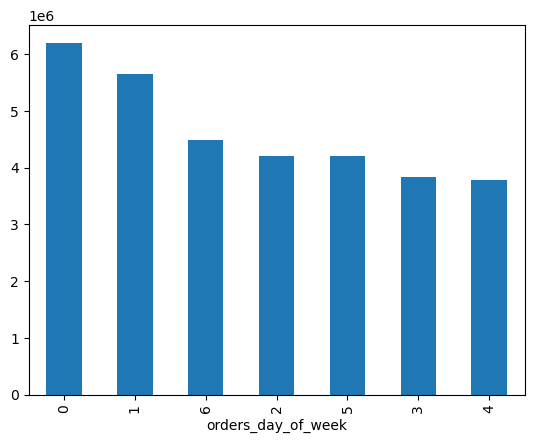

In [4]:
## Create a Bar Chart for your “orders_day_of_week” column

ords_prods_merge['orders_day_of_week'].value_counts().plot.bar()

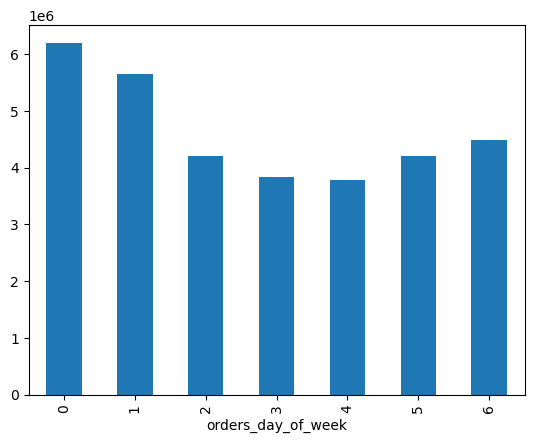

In [5]:
#  Sort the bars in your chart according to their index order --> days of the week listed chronologically

bar = ords_prods_merge['orders_day_of_week'].value_counts().sort_index().plot.bar()

### You can reorder your columns to appear in their indexed order when printing frequencies, too.

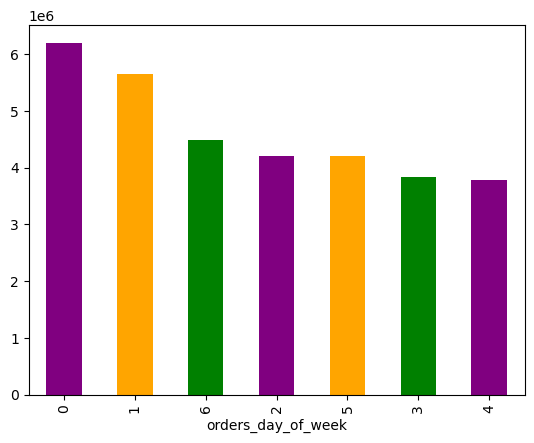

In [7]:
# Change color on the bar chart

bar = ords_prods_merge['orders_day_of_week'].value_counts().plot.bar(color = ['purple', 'orange', 'green'])

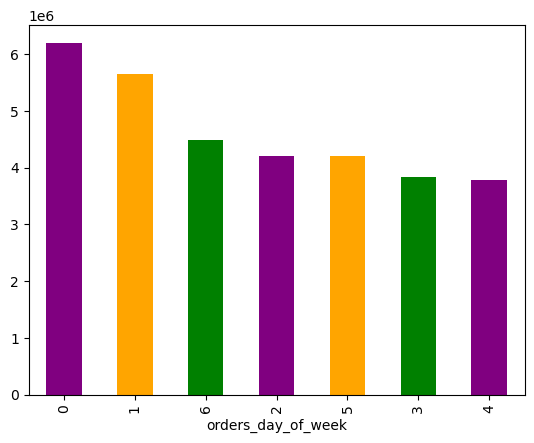

In [8]:
bar.figure

### This output means that my bar chart has been saved within the bar object, whereas the previous command (which created the first bar chart) was only a preview.

In [9]:
# Export bar chart as image file

bar.figure.savefig(os.path.join(path, '04 Analysis','Visualisations', 'bar_orders_dow.png'))

## Histograms and Scatterplots

<Axes: ylabel='Frequency'>

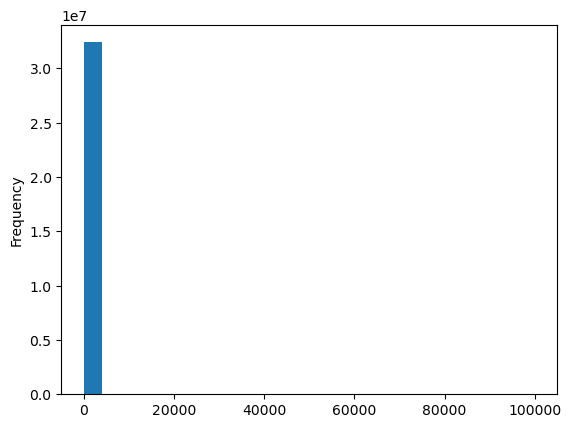

In [10]:
# Create a histogram of the “prices” column

ords_prods_merge['prices'].plot.hist(bins = 25)

In [11]:
# Check 'prices' statits

ords_prods_merge['prices'].describe()

count    3.240486e+07
mean     1.198023e+01
std      4.956554e+02
min      1.000000e+00
25%      4.200000e+00
50%      7.400000e+00
75%      1.130000e+01
max      9.999900e+04
Name: prices, dtype: float64

In [13]:
ords_prods_merge['prices'].mean()

11.980225638383454

In [14]:
ords_prods_merge['prices'].median()

7.4

In [15]:
ords_prods_merge['prices'].max()

99999.0

### Max value is not realistic, data is corrupted somehow. That´s why there´s a single bar on the hystogram + a second invisible one for the max.

<Axes: xlabel='prices', ylabel='prices'>

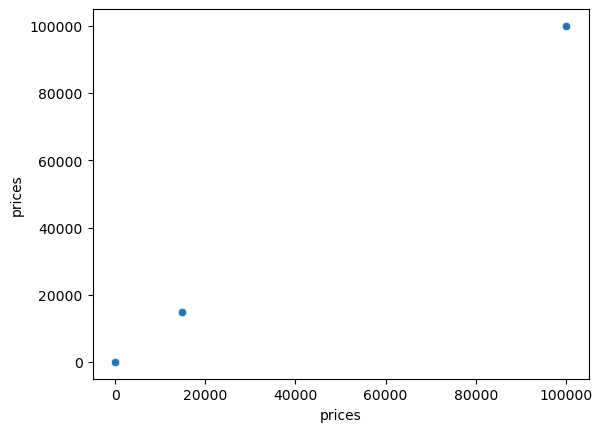

In [16]:
# Create a scatterplot to visualize the distribution of data points in order to identify any outliers

sns.scatterplot(x = 'prices', y = 'prices',data = ords_prods_merge)

In [17]:
### There seem to be two outliers, let´s check what orders are above the 'normal' price of 100

ords_prods_merge.loc[ords_prods_merge['prices'] > 100]

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_last_order,product_id,add_to_cart_order,reordered,product_name,...,busiest_day,busiest_days,busiest_hour,busiest_hours,max_order,loyalty_flag,avg_price,spending_flag,median_dslo,frequency_flag
10030345,912404,17,12,2,14,5.0,21553,5,0,Lowfat 2% Milkfat Cottage Cheese,...,Regularly day,Regularly busy,Most orders,Most orders,40,Regular customer,108.648299,High spender,5.0,Frequent customer
10030346,603376,17,22,6,16,4.0,21553,3,1,Lowfat 2% Milkfat Cottage Cheese,...,Regularly day,Regularly busy,Most orders,Most orders,40,Regular customer,108.648299,High spender,5.0,Frequent customer
10030347,3264360,135,2,2,21,13.0,21553,6,0,Lowfat 2% Milkfat Cottage Cheese,...,Regularly day,Regularly busy,Average orders,Average orders,4,New customer,1154.792308,High spender,12.0,Regular customer
10030348,892534,135,3,0,8,12.0,21553,3,1,Lowfat 2% Milkfat Cottage Cheese,...,Busiest day,Busiest days,Average orders,Average orders,4,New customer,1154.792308,High spender,12.0,Regular customer
10030349,229704,342,8,1,19,30.0,21553,9,0,Lowfat 2% Milkfat Cottage Cheese,...,Regularly day,Busiest days,Average orders,Average orders,16,Regular customer,114.426619,High spender,23.0,Non-frequent customer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29166209,2249946,204099,29,0,8,4.0,33664,1,0,2 % Reduced Fat Milk,...,Busiest day,Busiest days,Average orders,Average orders,39,Regular customer,1106.743956,High spender,4.0,Frequent customer
29166210,2363282,204099,31,0,9,2.0,33664,1,1,2 % Reduced Fat Milk,...,Busiest day,Busiest days,Most orders,Most orders,39,Regular customer,1106.743956,High spender,4.0,Frequent customer
29166211,3181945,204395,13,3,15,8.0,33664,25,0,2 % Reduced Fat Milk,...,Regularly day,Slowest days,Most orders,Most orders,15,Regular customer,451.153540,High spender,5.0,Frequent customer
29166212,2486215,205227,7,3,20,4.0,33664,8,0,2 % Reduced Fat Milk,...,Regularly day,Slowest days,Average orders,Average orders,12,Regular customer,1178.381871,High spender,12.0,Regular customer


### Dairy products can´t be this expensive! Data is definitely corrupt so let´s remove the prices

In [18]:
# Mark the above values as missing

ords_prods_merge.loc[ords_prods_merge['prices'] >100, 'prices'] = np.nan

In [19]:
# Check maximum price value now

ords_prods_merge['prices'].max()

25.0

<Axes: ylabel='Frequency'>

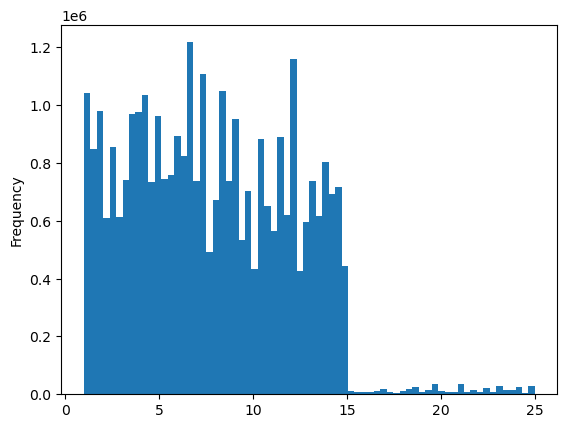

In [20]:
# Retry creating a histogram with more granularity

ords_prods_merge['prices'].plot.hist(bins = 70)

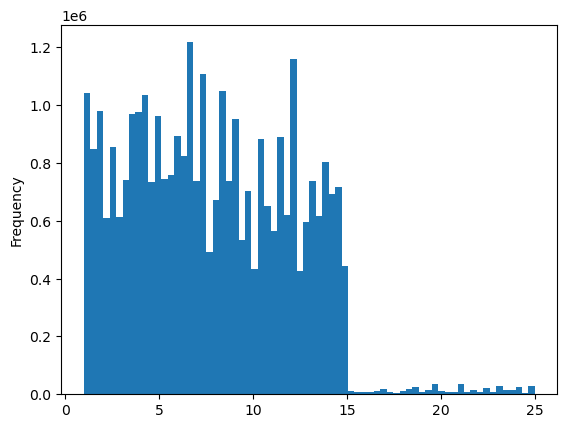

In [25]:
# Save plot into Notebook

hist = ords_prods_merge['prices'].plot.hist(bins=70)

In [26]:
# Export histogram as image file

hist.figure.savefig(os.path.join(path, '04 Analysis','Visualisations', 'hist_orders_dow.png'))

# Sampling

In [27]:
# Create a random sample 70/30

np.random.seed(4)
dev = np.random.rand(len(ords_prods_merge)) <= 0.7

### Each row in the dataframe is “assigned” one of these numbers, and then the numbers are compared to a value. In this case, the value is 0.7, since you want a 70/30 split. Any rows whose assigned number is less than 0.7 are placed in one sample, while any rows whose assigned number is greater than 0.7 are placed in the other, effectively splitting the dataframe into two dataframes at a 70/30 ratio

In [28]:
# Store 70% of the sample in the dataframe big

big = ords_prods_merge[dev]

In [29]:
# Store 30% of the sample in the dataframe small

small = ords_prods_merge[~dev]

### Check if new samples were created successfully -> if we add up the number of rows of both sample together, it should equal the numer of rows of original data frame

In [32]:
len (ords_prods_merge)

32404859

In [33]:
len(big)+len(small)

32404859

# Line Charts

In [34]:
# Create a new dataframe that contains only the necessary columns for the line chart

df_2 = small[['orders_day_of_week','prices']]

In [35]:
# Check output

df_2

,orders_day_of_week,prices
0,2,9.0
2,3,9.0
3,4,9.0
6,1,9.0
10,1,9.0
...,...,...
32404841,1,8.8
32404842,2,8.8
32404843,0,3.7
32404849,3,3.7


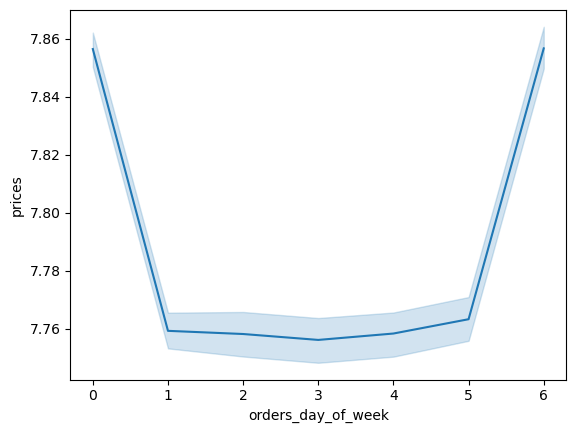

In [36]:
# Create Line chart that shows the development of the “prices” column across the days of the week.

line = sns.lineplot(data = df_2, x = 'orders_day_of_week',y = 'prices')

In [37]:
# Export line chart as image file

line.figure.savefig(os.path.join(path, '04 Analysis','Visualisations', 'line_orders_dow.png'))